Enter number of nodes:  4


Enter the names of the nodes (e.g., A B C):


 A B C D
Enter number of edges:  4


Enter edges as pairs of node names (e.g., A B):


 A B
 A C
 B C
 C D


Adding a new color: green because existing colors are not sufficient.
Adding a new color: blue because existing colors are not sufficient.

Final Assignment of Colors:
Node A: red
Node B: green
Node C: blue
Node D: red

Total colors used: 3


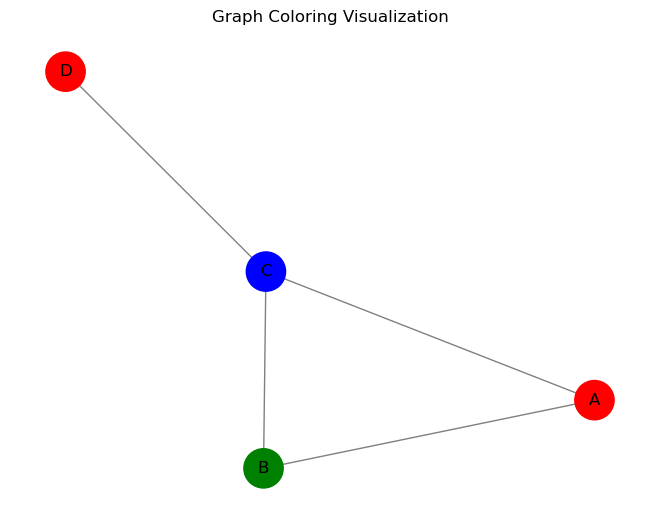


Do you want to color another graph? (yes/no):  no


Exiting. Goodbye!


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# List of actual color names to use (can extend this list)
color_palette = [
    "red", "green", "blue", "yellow", "orange", "purple",
    "pink", "cyan", "magenta", "brown", "lime", "olive",
    "navy", "grey", "teal", "indigo", "maroon", "turquoise"
]

def is_valid(node, color, assignment, graph):
    for neighbor in graph[node]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def backtrack(graph, colors, assignment, node_order, idx):
    if idx == len(node_order):
        return True

    node = node_order[idx]
    for color in colors:
        if is_valid(node, color, assignment, graph):
            assignment[node] = color
            if backtrack(graph, colors, assignment, node_order, idx + 1):
                return True
            del assignment[node]

    # Add new color if no valid color found
    if len(colors) < len(color_palette):
        new_color = color_palette[len(colors)]
        print(f"Adding a new color: {new_color} because existing colors are not sufficient.")
        colors.append(new_color)
        assignment[node] = new_color
        if backtrack(graph, colors, assignment, node_order, idx + 1):
            return True
        del assignment[node]
        colors.pop()
    else:
        print("Ran out of predefined colors.")
    return False

def visualize_graph(graph, assignment):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    node_colors = [assignment.get(node, "white") for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=12, edge_color='gray')
    plt.title("Graph Coloring Visualization")
    plt.show()

def main():
    n = int(input("Enter number of nodes: "))
    print("Enter the names of the nodes (e.g., A B C):")
    node_names = input().split()

    if len(node_names) != n:
        print("Number of node names does not match the number of nodes.")
        return

    graph = {name: [] for name in node_names}

    e = int(input("Enter number of edges: "))
    print("Enter edges as pairs of node names (e.g., A B):")
    for _ in range(e):
        u, v = input().split()
        if u in graph and v in graph:
            graph[u].append(v)
            graph[v].append(u)
        else:
            print(f"Invalid edge ({u}, {v}). Node not found.")
            return

    colors = [color_palette[0]]
    assignment = {}
    node_order = list(graph.keys())

    success = backtrack(graph, colors, assignment, node_order, 0)

    if success:
        print("\nFinal Assignment of Colors:")
        for node, color in assignment.items():
            print(f"Node {node}: {color}")
        print(f"\nTotal colors used: {len(set(assignment.values()))}")
        visualize_graph(graph, assignment)
    else:
        print("Failed to color the graph with constraints.")

if __name__ == "__main__":
    while True:
        main()
        again = input("\nDo you want to color another graph? (yes/no): ").strip().lower()
        if again not in ['yes', 'y']:
            print("Exiting. Goodbye!")
            break
        print("\n-----------------------\n")
